# Generating a Second Order Autoregressive Process

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import sklearn.datasets
# from scipy.misc import derivative
# import math

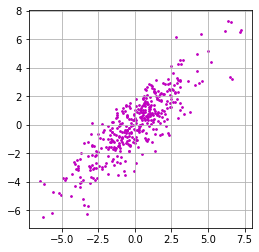

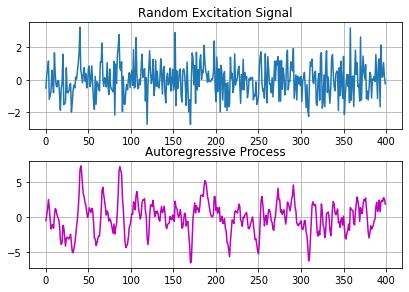

In [2]:
# Length of time series
#
N=400

# Gaussian random numbers as an excitation signal 
#
ex = np.random.randn(N)

# Second order AR Process 
#
a = np.array([1.2, -0.4])

S0 = ex.copy();
for n in range(2, N):
    x = np.array([S0[n-1], S0[n-2]]) 
    S0[n] = np.dot(x, a) + ex[n]
    
plt.figure(figsize=(4,4))
for n in range(2, N):
    plt.scatter(S0[n-1], S0[n-2], s=3, c='m')
# plt.plot((-4,4), (a[0],a[1]))
plt.grid(True)
    
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,4)) 
plt.tight_layout()
ax[0].plot(range(N), ex)
ax[0].grid(True)
ax[0].set_title("Random Excitation Signal")

ax[1].plot(range(N), S0, color='m') 
ax[1].grid(True) 
ax[1].set_title("Autoregressive Process")

plt.savefig("SecondorderARProcess.png")

# Generating a Time-varying AR process


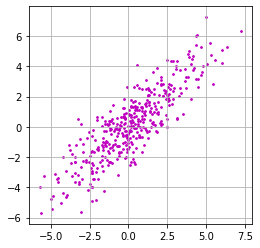

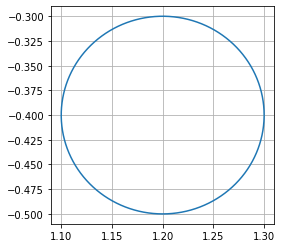

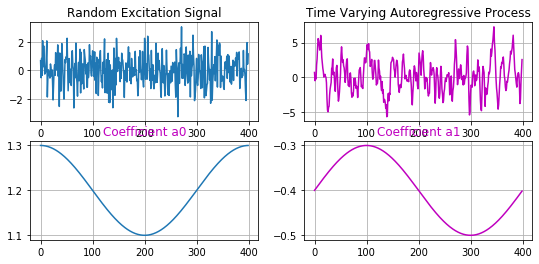

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Length of time series
#
N=400

# Gaussian random numbers as an excitation signal 
#
ex = np.random.randn(N)

# Second order AR Process with coefficients slowly changing in time 
#
a0 = np.array([1.2, -0.4])
A = np.zeros((N,2))
omega, alpha = N/2, 0.1

for n in range(N):
    A[n,0] = a0[0] + alpha * np.cos(2*np.pi*n/N) 
    A[n,1] = a0[1] + alpha * np.sin(2*np.pi*n/N)

S1 = ex.copy();
for n in range(2, N):
    x = np.array([S1[n-1], S1[n-2]])
    S1[n] = np.dot(x, A[n,:]) + ex[n]

plt.figure(figsize=(4,4))
for n in range(2, N):
    plt.scatter(S1[n-1], S1[n-2], s=3, c='m')
plt.grid(True)

plt.figure(figsize=(4,4))
plt.plot(A[:,0],A[:,1])
plt.grid(True)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,4)) 
# plt.tight_layout()

ax[1,0].plot(range(N), A[:,0]) 
ax[1,0].grid(True) 
ax[1,0].set_title("Coefficient a0", color='m')
                  
ax[1,1].plot(range(N), A[:,1], color='m') 
ax[1,1].grid(True) 
ax[1,1].set_title("Coefficient a1", color='m')

             
ax[0,0].plot(range(N), ex)
ax[0,0].grid(True)
ax[0,0].set_title("Random Excitation Signal")
             
ax[0,1].plot(range(N), S1, color='m')
ax[0,1].grid(True)
ax[0,1].set_title("Time Varying Autoregressive Process")
                                     
plt.savefig("arChange.png")

# Kalman Filter Estimates of second order AR parameters

In [7]:
# Time series data y
# th_n_n: estimate at time n using all data upto time n
# th_n_n1: estimate at time n using all data upto time n-1
#
ePlot = np.zeros(N)
#

# Initialize
#
x = np.zeros((2,1))
th_n1_n1 = np.random.randn(2,1) 
P_n1_n1 = 0.001 * np.eye(2)

th_0 = th_n1_n1.copy()
P_0 = P_n1_n1.copy()

[ 1.2 -0.4]
[[0.9090942 ]
 [0.00171291]]


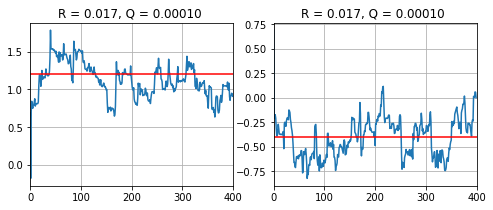

In [8]:
# Noise variances -- hyperparameters (to be tuned)
# Set measurement noise as fraction of data variance (first few samples) 
# Guess for process noise
#
R = 0.02 * np.std(ex[0:10]) # noise of dynamic function
beta = 0.0001
Q = beta*np.eye(2) # noise of observation

# Initialize
#
th_n1_n1 = th_0.copy()
P_n1_n1 = P_0.copy()
y = S0

# Space to store and plot 
#
th_conv = np.zeros([2, N])

# First two estimates are initial guesses #
th_conv[0,0] = th_n1_n1[0]
th_conv[0,1] = th_n1_n1[1]
th_conv[1,0] = th_n1_n1[0] 
th_conv[1,1] = th_n1_n1[1]

# Kalman Iteration Loop (univariate observation, start from time step 2)
#
# plt.figure(figsize=(4,4))
for n in range(2, N):
    # Input vector contains past velues 
    x[0] = y[n-1]
    x[1] = y[n-2]
    
    # Prediction of state and covariance 
    th_n_n1 = th_n1_n1.copy()
    P_n_n1 = P_n1_n1 + Q
    yh = th_n_n1.T @ x 
    en = y[n] - yh 
    ePlot[n] = en

    # Kalman gain (kn) and innovation variance (den)
    #
    den = x.T @ P_n_n1 @ x + R 
    kn = P_n_n1 @ x / den
#     plt.scatter(kn[0],kn[1], s=3, c='m')
    
    # Posterior update
    #
    th_n_n = th_n_n1 + kn * en
    P_n_n = (np.eye(2) - kn @ x.T) @ P_n_n1
             
    # Save
    th_conv[0,n] = th_n_n[0] 
    th_conv[1,n] = th_n_n[1]
    
    # Remember for next step 
    #
    th_n1_n1 = th_n_n.copy() 
    P_n1_n1 = P_n_n.copy()
         
print(a) 
print(th_n_n)
         
    
# fig, ax = plt.subplots(figsize=(3,3)) 
# ax.plot(ePlot)
# ax.set_xlim(0,N)
# ax.grid(True)
# ax.set_title("ePlot")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3)) 
ax[0].plot(th_conv[0])
ax[0].set_xlim(0,N)
ax[0].axhline(y=a[0], color='r')
# ax[0].plot(A[:,0], color='r')
ax[0].set_title("R = %4.3f, Q = %6.5f "%(R, beta))
ax[0].grid(True)

ax[1].plot(th_conv[1])
ax[1].set_xlim(0,N)
ax[1].axhline(y=a[1], color='r')
# ax[1].plot(A[:,1], color='r')
ax[1].set_title("R = %4.3f, Q = %6.5f "%(R, beta))
ax[1].grid(True)

# plt.savefig("kl_4.png")

# Partile Filter Estimates of second order AR parameters. 

A distribution of random particles in 2D

Text(0.5, 1.0, 'Initial Particles')

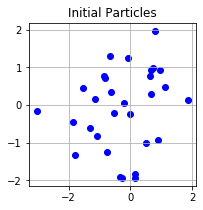

In [9]:
Ns = 30

# Initial particles
#
parts = np.random.randn(Ns, 2)

fig, ax = plt.subplots(figsize=(3,3)) 
ax.scatter(parts[:,0], parts[:,1], color='b') 
ax.grid(True)
ax.set_title("Initial Particles")


Algorithm 1: Sequential Monte Carlo

In [10]:
# Likelihood from Gaussian noise
# Needs estimate, true value and noise variance 
def particle_likelihood(y0, yh, sig):
    lhood = (1/(2*np.pi*sig))*np.exp(-0.5*((y0-yh)/sig)**2) 
    return lhood

[[ 0.84566249]
 [-0.65752316]]


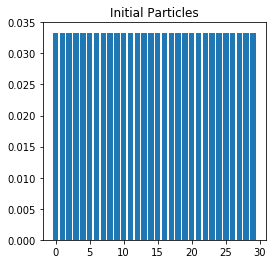

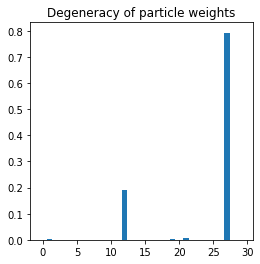

In [11]:
# Process noise covariance is beta*I 
#
beta = 0.01

# Observation noise variance 
#
sig = np.std(ex)

# Initial input vector and particle weights 
#
x = np.zeros((2,1))
pweights = np.ones((Ns,1)) / Ns
# print(pweights)

# Observe how the weights change as you update
#
fig, ax = plt.subplots(figsize=(4,4)) 
ax.bar(np.arange(len(pweights)), pweights[:,0])
ax.set_title("Initial Particles")
# plt.savefig("pl_0.png")

# Go over the data
#
S = S0
for n in range(2, 10):
    
    x[0] = S[n-1] 
    x[1] = S[n-2]
    
    # Sample particles from the prior
    # (in the simplest case here, random perturbation)
    #
    for p in range(Ns):
        parts[p,:] = parts[p,:] + beta*np.random.randn(1,2)
        
    # Predictions and likelihoods
    # 
    sh = np.zeros((Ns, 1))
    lhoods = sh.copy()
    for particle in range(Ns):
        th = parts[particle,:].T.copy()
        sh[particle] = x.T @ th
        lhoods[particle] = particle_likelihood(S[n], sh[particle], sig)
        
    # multiply prior weigts by likelihoods and normalize 
    #
    # print(lhoods)
    pweights = pweights * lhoods
    pweights = pweights / np.sum(pweights)

# Observe how the weights change as you update
#
fig, ax = plt.subplots(figsize=(4,4)) 
ax.bar(np.arange(len(pweights)), pweights[:,0])
ax.set_title("Degeneracy of particle weights")
# plt.savefig("pl_1.png")

print(np.dot(parts.T, pweights))

Algorithm 2: Resampling algorithm

[[ 0.85249624]
 [-0.65881407]]


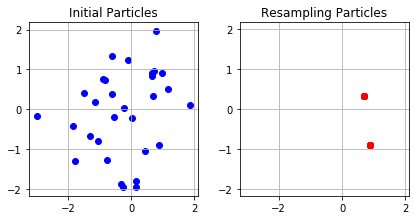

In [12]:
# initialize the CDF
#
c = np.zeros(Ns)
label = np.zeros(Ns)
rparts = np.zeros(parts.shape)
rweights = np.zeros(pweights.shape)
s = 0
for i in range(Ns):
    s += pweights[i]
    c[i] = s
    
# Resampling 
#
u1 = np.random.rand() / Ns
j = 0   
for i in range(Ns):
    u = u1 + (1 / Ns) * i
    while c[j] < u and j < Ns - 1:
        j += 1
    label[i] = j
    rparts[i] = parts[j]
    rweights[i] = 1 / Ns

# Scatter the resample result
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,3)) 
plt.tight_layout()
ax[0].scatter(parts[:,0], parts[:,1], color='b') 
ax[0].grid(True)
ax[0].set_title("Initial Particles")

ax[1].scatter(parts[:,0], parts[:,1], s=0, color='b') 
ax[1].scatter(rparts[:,0], rparts[:,1], color='r')
ax[1].grid(True)
ax[1].set_title("Resampling Particles")

print(np.dot(rparts.T, rweights))
# plt.savefig("pl_2.png")    

Particle filter: alg 1 + alg 2

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Generate the AR signal

In [14]:
# Length of time series
#
N = 400

# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)

# Second order AR Process
#
a = np.array([1.2, -0.4])
A_record = np.zeros((N,2))

S0 = ex.copy();
for n in range(2, N):
    x = np.array([S0[n - 1], S0[n - 2]])
    S0[n] = np.dot(x, a) + ex[n]

Perpare some particles

In [15]:
Ns = 30

# Initial particles
#
parts = np.random.randn(Ns, 2)
parts_org = parts.copy()

In [16]:
# resampling
#
def resample(parts, weights):
    # initialize the CDF
    #
    c = np.zeros(Ns)
    label = np.zeros(Ns)
    rparts = np.zeros(parts.shape)
    rweights = np.zeros(weights.shape)
    s = 0
    for i in range(Ns):
        s += weights[i]
        c[i] = s

    # Resampling
    #
    u1 = np.random.rand() / Ns
    j = 0
    for i in range(Ns):  
        u = u1 + (1 / Ns) * i
        while c[j] < u and j < Ns - 1:
            j += 1
        label[i] = j
        rparts[i] = parts[j]
        rweights[i] = 1 / Ns

    return rparts, rweights, label


In [17]:
# Likelihood from Gaussian noise
# Needs estimate, true value and noise variance
def particle_likelihood(y0, yh, sig):
    lhood = np.exp(-0.5*((y0-yh)/sig)**2)
    return lhood

# Process noise covariance is beta*I
#
beta = 0.01

# Observation noise variance
#
sig = np.std(ex)

# Initial input vector and particle weights
#
x = np.zeros((2, 1))
pweights = np.ones((Ns, 1)) / Ns
pweights_org = pweights.copy()

# Go over the data
#
S = S1
Nt = 3
for n in range(2, N):

    x[0] = S[n - 1]
    x[1] = S[n - 2]

    # Sample particles from the prior
    # (in the simplest case here, random perturbation)
    #
    for p in range(Ns):
        parts[p, :] = parts[p, :] + beta * np.random.randn(1, 2)

    # Predictions and likelihoods
    #
    sh = np.zeros((Ns, 1))
    lhoods = sh.copy()
    for particle in range(Ns):
        th = parts[particle, :].T.copy()
        sh[particle] = x.T @ th
        lhoods[particle] = particle_likelihood(S[n], sh[particle], sig)

    # multiply prior weigts by likelihoods and normalize
    #
    # print(lhoods)
    pweights = pweights * lhoods
    pweights = pweights / np.sum(pweights)

    # resample
    #
    neff = 1 / np.sum(pweights**2)
    if neff < Nt:
        parts, pweights, labels = resample(parts, pweights)
    
    # record prediction of A value
    #
    A_predict = np.dot(parts.T, pweights)
    A_record[n,0] = A_predict[0]
    A_record[n,1] = A_predict[1]

print(np.dot(parts.T, pweights))

[[ 1.27262192]
 [-0.46249086]]


<BarContainer object of 30 artists>

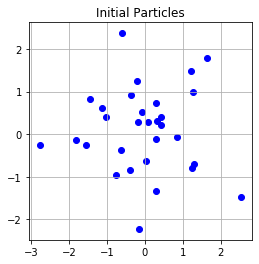

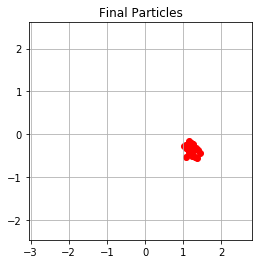

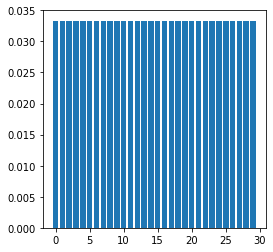

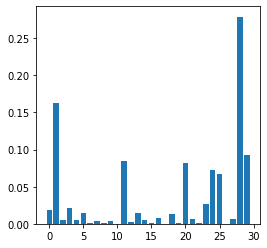

In [18]:
# Scatter the final distribution
#
fig, ax = plt.subplots(figsize=(4,4)) 
ax.scatter(parts_org[:,0], parts_org[:,1], color='b') 
ax.grid(True)
ax.set_title("Initial Particles")
# plt.savefig("pl_0.png")

fig, ax = plt.subplots(figsize=(4,4)) 
ax.scatter(parts_org[:,0], parts_org[:,1], s=0, color='b')
ax.scatter(parts[:,0], parts[:,1], color='r') 
ax.grid(True)
ax.set_title("Final Particles")
# plt.savefig("pl_1.png")

fig, ax = plt.subplots(figsize=(4,4)) 
ax.bar(np.arange(len(pweights_org)), pweights_org[:,0])
# plt.savefig("pl_2.png")

fig, ax = plt.subplots(figsize=(4,4)) 
ax.bar(np.arange(len(pweights)), pweights[:,0])
# plt.savefig("pl_3.png")



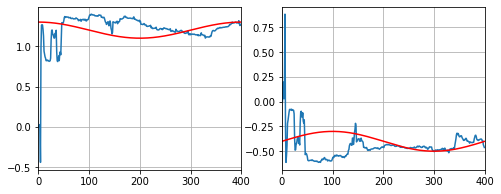

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3)) 
ax[0].plot(A_record[:,0])
ax[0].set_xlim(0,N)
# ax[0].axhline(y=a[0], color='r')
ax[0].plot(A[:,0], color='r')
ax[0].grid(True)

ax[1].plot(A_record[:,1])
ax[1].set_xlim(0,N)
# ax[1].axhline(y=a[1], color='r')
ax[1].plot(A[:,1], color='r')
ax[1].grid(True)

# plt.savefig("pl_5.png")

# Generating Data for Logistic Regression Classifier

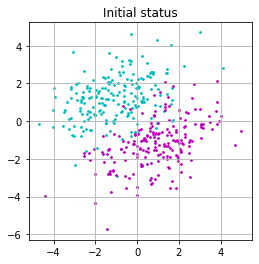

In [20]:
NumDataPerClass = 200

# Two-class problem, distinct means, equal covariance matrices
#
alpha = 1
m1 = [[-alpha, alpha]]
m2 = [[alpha, -alpha]]
C = [[2, 1], [1, 2]]

# Set up the data
#
A = np.linalg.cholesky(C)

X1 = np.random.randn(NumDataPerClass,2) @ A + m1
Y1 = np.ones((NumDataPerClass,1))

X2 = np.random.randn(NumDataPerClass,2) @ A + m2
Y2 = np.zeros((NumDataPerClass,1))

X = np.vstack((X1,X2))
Y = np.vstack((Y1,Y2))
S2 = np.hstack((X,Y))
np.random.shuffle(S2)


fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X1[:,0], X1[:,1], s=3, c='c')
ax.scatter(X2[:,0], X2[:,1], s=3, c='m')
ax.set_title("Initial status")
ax.grid(True)

# plt.savefig('ekf_0.png')

# Extended Kalman Filter

[[ 0.84695767]
 [-0.31582395]]
[[-1.28735938]
 [ 1.68368007]]


Text(0.5, 1.0, 'Extended Kalman Filter: Cross Entropy Loss Function')

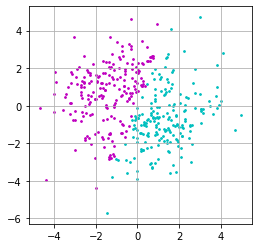

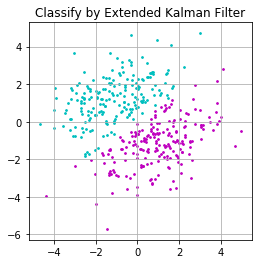

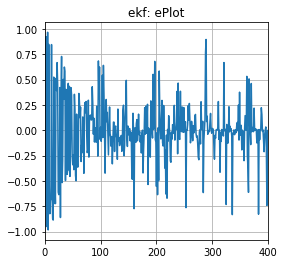

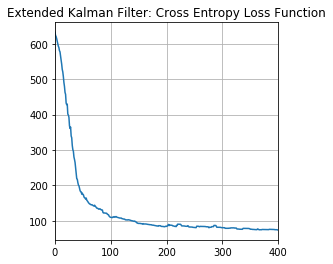

In [21]:
# two gaussian distribution class data y
y = S2
# th_n_n: estimate at time n using all data upto time n
# th_n_n1: estimate at time n using all data upto time n-1
#

echo = 400
I = np.ones(N)
ePlot = np.zeros(echo)
loss = np.zeros(echo)

#

# Initialize
#
x = np.zeros((2,1))
th_n1_n1 = np.random.randn(2,1) 
th_0 = th_n1_n1.copy()
P_n1_n1 = 0.001 * np.eye(2)

# Noise variances -- hyperparameters (to be tuned)
# Set measurement noise as fraction of data variance (first few samples) 
# Guess for process noise
#
R = 0.02 * np.std(ex[0:10]) # noise of dynamic function
beta = 0.0001
Q = beta*np.eye(2) # noise of observation


# logistic regression
#
def logistic_regression(x, theta):
    return 1 / (1 + np.exp(-(theta.T @ x)))

# Kalman Iteration Loop (univariate observation, start from time step 2)
#
for n in range(echo):
    # Input vector contains past velues 
    k = np.floor(np.random.rand()*N).astype(int)
    x[0] = y[k, 0]
    x[1] = y[k, 1]

    # Prediction of state and covariance 
    th_n_n1 = th_n1_n1.copy()
    P_n_n1 = P_n1_n1 + Q

    yh = logistic_regression(x, th_n_n1)
    en = y[k, 2] - yh 
    ePlot[n] = en
    loss[n] = - np.sum(y[:,2] * np.log(logistic_regression(y[:,0:2].T, th_n_n1)) + (I-y[:,2])* np.log(I-logistic_regression(y[:,0:2].T, th_n_n1)))
    
    # jacobian matrix
    #
    h = yh * (1 - yh) * x
    
    # Kalman gain (kn) and innovation variance (den)
    #
    
    den = h.T @ P_n_n1 @ h + R 
    kn = P_n_n1 @ h / den
    
    # Posterior update
    #
    th_n_n = th_n_n1 + kn * en
    P_n_n = (np.eye(2) - kn @ h.T) @ P_n_n1
    
    # Remember for next step 
    #
    th_n1_n1 = th_n_n.copy() 
    P_n1_n1 = P_n_n.copy()
         
print(th_0)
print(th_n_n)

plt.figure(figsize=(4,4))
for i in range(N):
    x[0] = y[i, 0]
    x[1] = y[i, 1]
    if logistic_regression(x,th_0)> 0.5:
        plt.scatter(x[0], x[1], s=3, c='c')
    else:
        plt.scatter(x[0], x[1], s=3, c='m')
# plt.plot((-4,4), (th_0[0],th_0[1]))
plt.grid(True)

fig, ax = plt.subplots(figsize=(4,4))
for i in range(N):
    x[0] = y[i, 0]
    x[1] = y[i, 1]
    if logistic_regression(x,th_n_n)> 0.5:
        ax.scatter(x[0], x[1], s=3, c='c')
    else:
        ax.scatter(x[0], x[1], s=3, c='m')
ax.grid(True)
ax.set_title("Classify by Extended Kalman Filter")
# plt.savefig('ekf_1.png')

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(ePlot)
ax.set_xlim(0,echo)
ax.grid(True)
ax.set_title("ekf: ePlot")

fig, ax = plt.subplots(figsize=(4,4)) 
ax.plot(loss)
ax.set_xlim(0,echo)
ax.grid(True)
ax.set_title("Extended Kalman Filter: Cross Entropy Loss Function")
# plt.savefig('ekf_2.png')


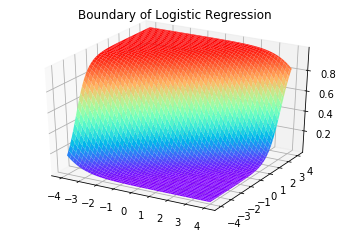

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
figure=plt.figure()
#ax = Axes3D(figure)
ax=figure.gca(projection="3d")
axis=np.linspace(-4,4,100)
x = np.zeros((2,1))
z = np.zeros((100,100))
x0,x1 =np.meshgrid(axis,axis)
for i in range(100):
    for j in range(100):
        x[0] = x0[i,j]
        x[1] = x1[i,j]
        z[i,j]=logistic_regression(x,th_n_n)
#ax.plot_surface(x,y,z,rstride=10,cstride=4,cmap=cm.YlGnBu_r)
ax.plot_surface(x0, x1, z, cmap = 'rainbow')
ax.set_title("Boundary of Logistic Regression")
plt.show()
# plt.savefig('ekf_3.png')

# online PCA

Algorithm 1 An online algorithm for Principal Component Analysis

In [23]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

dataInitial = sklearn.datasets.load_boston()
X = np.array(dataInitial.data)

N, d = X.shape
print(N, d)
l = 5
U = np.zeros((d, l))
C = np.zeros((d, d))
Y = np.zeros((N, l))

theta = 2 * np.trace(X.T @ X) / l
print(theta)

for i in range(N):
    r = X[i] - U @ U.T @ X[i]
    while np.linalg.norm(C + r @ r.T) >= theta:
        u, Lamda = np.linalg.eig(C)
        
        # add u to the next zero column of U
        #
        k = 0
        while k < l:
            if np.linalg.norm(U[:, k]) == 0:
                U[:, k] = u.copy()
                break
            else:
                k += 1
        
        r = X[i] - U @ U.T @ X[i]
        C = C - Lamda @ u @ u.T

    C = C + r @ r.T
    Y[i] = U.T @ X[i]
    
print(Y)

    

506 13
68359868.7298486
[[ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000]
 ...
 [-5.47798735e-040  9.47312430e+014  5.32525468e+031  2.12424244e+035
  -1.68044098e+132]
 [-5.47798735e-040  1.70862359e+015  9.60491541e+031  2.12424244e+035
  -3.03093362e+132]
 [-5.47798735e-040  7.39171861e+014  4.15520613e+031  2.12424244e+035
  -1.31121966e+132]]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in matmul
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in matmul
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in matmul
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in add


Algorithm 2 An efficient online PCA algorithm

In [24]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

dataInitial = sklearn.datasets.load_boston()
X = np.array(dataInitial.data)
N, d = X.shape
e = np.random.rand()/15
k = 6
l = 9

print(N, d)


U = np.zeros((np.floor(d * k / (e**3)).astype(int)))
I = np.identity(np.floor(d * k / (e**3)).astype(int))
Z = np.zeros((np.floor(d * k / (e**2)).astype(int)))
w = 0
w_0 = 0
w_U = np.zeros((np.floor(k / e**3).astype(int)))

for i in range(N):
    w = w + np.linalg.norm(X[i])**2
    r = X[i] - U @ U.T @ x[i]
    C = (I - U @ U.T) @ Z @ Z.T @ (I - U @ U.T)
    
    while np.linalg.norm(C + r @ r.T) >= max(w,w_0) * (e**2) / k:
        u, Lamda = np.linalg.eig(C)
        w_U = Lamda.copy
        
        # add u to the next zero column of U
        #
        k = 0
        while k < l:
            if np.linalg.norm(U[:, k]) == 0:
                U[:, k] = u.copy()
                break
            else:
                k += 1
        
        C = (I - U @ U.T) @ Z @ Z.T @ (I - U @ U.T)
        r = X[i] - U @ U.T @ X[i]

    C = C + r @ r.T
    Y[i] = U.T @ X[i]
    
print(Y)


506 13


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)